In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded['representation']
    num_points = loaded['num_train_points']

    metrics = {
        'representation': loaded['representation'],
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    drfp_rbf_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['baseline']['metrics']['drfp-rbf']['mean_absolute_error'],
        'max_error': loaded['baseline']['metrics']['drfp-rbf']['max_error'],
        'mse': loaded['baseline']['metrics']['drfp-rbf']['mean_squared_error']
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)


    ohe_tanimoto_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['baseline']['metrics']['ohe-tanimoto']['mean_absolute_error'],
        'max_error': loaded['baseline']['metrics']['ohe-tanimoto']['max_error'],
        'mse': loaded['baseline']['metrics']['ohe-tanimoto']['mean_squared_error']
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)


    rxnfp_linear_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['baseline']['metrics']['rxnfp-linear']['mean_absolute_error'],
        'max_error': loaded['baseline']['metrics']['rxnfp-linear']['max_error'],
        'mse': loaded['baseline']['metrics']['rxnfp-linear']['mean_squared_error']
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)



    rxnfp_rbf_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['baseline']['metrics']['rxnfp-rbf']['mean_absolute_error'],
        'max_error': loaded['baseline']['metrics']['rxnfp-rbf']['max_error'],
        'mse': loaded['baseline']['metrics']['rxnfp-rbf']['mean_squared_error']
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)


    drfp_linear_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['baseline']['metrics']['drfp-linear']['mean_absolute_error'],
        'max_error': loaded['baseline']['metrics']['drfp-linear']['max_error'],
        'mse': loaded['baseline']['metrics']['drfp-linear']['mean_squared_error']
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [6]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,200,0.166141,0.546373,0.043710
1,200,0.154546,0.526540,0.037799
2,200,0.166141,0.546373,0.043710
3,10,0.244481,0.559318,0.080758
4,10,0.227685,0.499171,0.068965
5,200,0.154546,0.526540,0.037799
6,200,0.166141,0.546373,0.043710
7,200,0.166141,0.546373,0.043710


In [7]:
compiled_grouped_res = compiled_res.groupby(['representation', 'num_train_points']).agg(['mean', 'std'])

In [8]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(['num_train_points']).agg(['mean', 'std'])

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(['num_train_points']).agg(['mean', 'std'])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(['num_train_points']).agg(['mean', 'std'])

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(['num_train_points']).agg(['mean', 'std'])

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(['num_train_points']).agg(['mean', 'std'])

In [9]:
compiled_grouped_res

mae           max_error            mse  \
                                     mean       std      mean  std      mean   
representation num_train_points                                                
DreherDoyle    10                     NaN       NaN       NaN  NaN       NaN   
               200               0.288333  0.028577       1.0  0.0  0.288333   
SuzukiMiyaura  10                0.350000       NaN       1.0  NaN  0.350000   

                                           
                                      std  
representation num_train_points            
DreherDoyle    10                     NaN  
               200               0.028577  
SuzukiMiyaura  10                     NaN

In [10]:
compiled_rxnfp_linear_grouped

mae           max_error                 mse          
                      mean       std      mean       std      mean       std
num_train_points                                                            
10                0.206898  0.029416  0.562108  0.089008  0.060991  0.011289
200               0.186732  0.000145  0.625428  0.014932  0.052423  0.000207

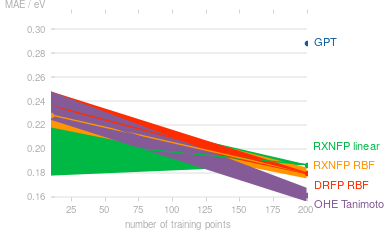

In [11]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    ax.plot(
        compiled_grouped_res.loc["DreherDoyle", :].index, 
        compiled_grouped_res.loc["DreherDoyle", :]['mae']['mean'], 
        label='GPT', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["DreherDoyle", :].index, 
        compiled_grouped_res.loc["DreherDoyle", :]['mae']['mean'] - compiled_grouped_res.loc["DreherDoyle", :]['mae']['std'], 
        compiled_grouped_res.loc["DreherDoyle", :]['mae']['mean'] + compiled_grouped_res.loc["DreherDoyle", :]['mae']['std'], 
    )

    ax.plot(
        compiled_rxnfp_linear_grouped.index, 
        compiled_rxnfp_linear_grouped['mae']['mean'], 
        label='RXNFP linear',
        marker='o'
    )

    ax.fill_between(
        compiled_rxnfp_linear_grouped.index, 
        compiled_rxnfp_linear_grouped['mae']['mean'] - compiled_rxnfp_linear_grouped['mae']['std'], 
        compiled_rxnfp_linear_grouped['mae']['mean'] + compiled_rxnfp_linear_grouped['mae']['std'], 
    )



    ax.plot(
        compiled_rxnfp_rbf_grouped.index, 
        compiled_rxnfp_rbf_grouped['mae']['mean'], 
        label='RXNFP RBF',
        marker='o'
    )

    ax.fill_between(
        compiled_rxnfp_rbf_grouped.index, 
        compiled_rxnfp_rbf_grouped['mae']['mean'] - compiled_rxnfp_rbf_grouped['mae']['std'], 
        compiled_rxnfp_rbf_grouped['mae']['mean'] + compiled_rxnfp_rbf_grouped['mae']['std'], 
    )


    ax.plot(
        compiled_drfp_linear_grouped.index, 
        compiled_drfp_linear_grouped['mae']['mean'], 
        label='DRFP RBF',
        marker='o'
    )

    ax.fill_between(
        compiled_drfp_linear_grouped.index, 
        compiled_drfp_linear_grouped['mae']['mean'] - compiled_drfp_linear_grouped['mae']['std'], 
        compiled_drfp_linear_grouped['mae']['mean'] + compiled_drfp_linear_grouped['mae']['std'], 
    )

    ax.plot(
        compiled_ohe_tanimoto_grouped.index, 
        compiled_ohe_tanimoto_grouped['mae']['mean'], 
        label='OHE Tanimoto',
        marker='o'
    )

    ax.fill_between(
        compiled_ohe_tanimoto_grouped.index, 
        compiled_ohe_tanimoto_grouped['mae']['mean'] - compiled_ohe_tanimoto_grouped['mae']['std'], 
        compiled_ohe_tanimoto_grouped['mae']['mean'] + compiled_ohe_tanimoto_grouped['mae']['std'], 
    )


    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    #ax.set_xscale('log')

fig.savefig('suzuki_regression_res.pdf', bbox_inches='tight')
